Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [38]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [39]:
Npx = 3 # Number of plaquette in each dimension
Npy = 3
model = site.SitesPBCx(Npx, Npy)

In [40]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 24
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Nxsites  6
Nyrows  4
['A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B'
 'B' 'A' 'B' 'A' 'B' 'A']
A


In [41]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]]


In [42]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(5, 0)


In [43]:
9 % 2

1

In [44]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bond = model.get_diagonalbonds()
anyon_bonds, px, py = model.get_anyonbonds()

In [45]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bond: ", np.array(diagonal_bond))
print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 7  8]
 [ 9 10]
 [11  6]
 [12 13]
 [14 15]
 [16 17]
 [19 20]
 [21 22]
 [23 18]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 0  5]
 [ 7  6]
 [ 9  8]
 [11 10]
 [14 13]
 [16 15]
 [12 17]
 [19 18]
 [21 20]
 [23 22]]
zz_bond:  [[ 0  6]
 [ 2  8]
 [ 4 10]
 [ 7 13]
 [ 9 15]
 [11 17]
 [12 18]
 [14 20]
 [16 22]]
diagonal_bond:  [[ 0  8]
 [ 2 10]
 [ 4  6]
 [ 7 15]
 [ 9 17]
 [11 13]
 [12 20]
 [14 22]
 [16 18]]
anyon_bonds:  [[16 17]]


In [46]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

Coordinates of sites:  [[ 0.         -0.        ]
 [ 0.8660254   0.5       ]
 [ 1.73205081 -0.        ]
 [ 2.59807621  0.5       ]
 [ 3.46410162 -0.        ]
 [ 4.33012702  0.5       ]
 [ 0.         -1.        ]
 [ 0.8660254  -1.5       ]
 [ 1.73205081 -1.        ]
 [ 2.59807621 -1.5       ]
 [ 3.46410162 -1.        ]
 [ 4.33012702 -1.5       ]
 [ 0.         -3.        ]
 [ 0.8660254  -2.5       ]
 [ 1.73205081 -3.        ]
 [ 2.59807621 -2.5       ]
 [ 3.46410162 -3.        ]
 [ 4.33012702 -2.5       ]
 [ 0.         -4.        ]
 [ 0.8660254  -4.5       ]
 [ 1.73205081 -4.        ]
 [ 2.59807621 -4.5       ]
 [ 3.46410162 -4.        ]
 [ 4.33012702 -4.5       ]]


Let us try to do a 3D plot with cyclindric coordinates

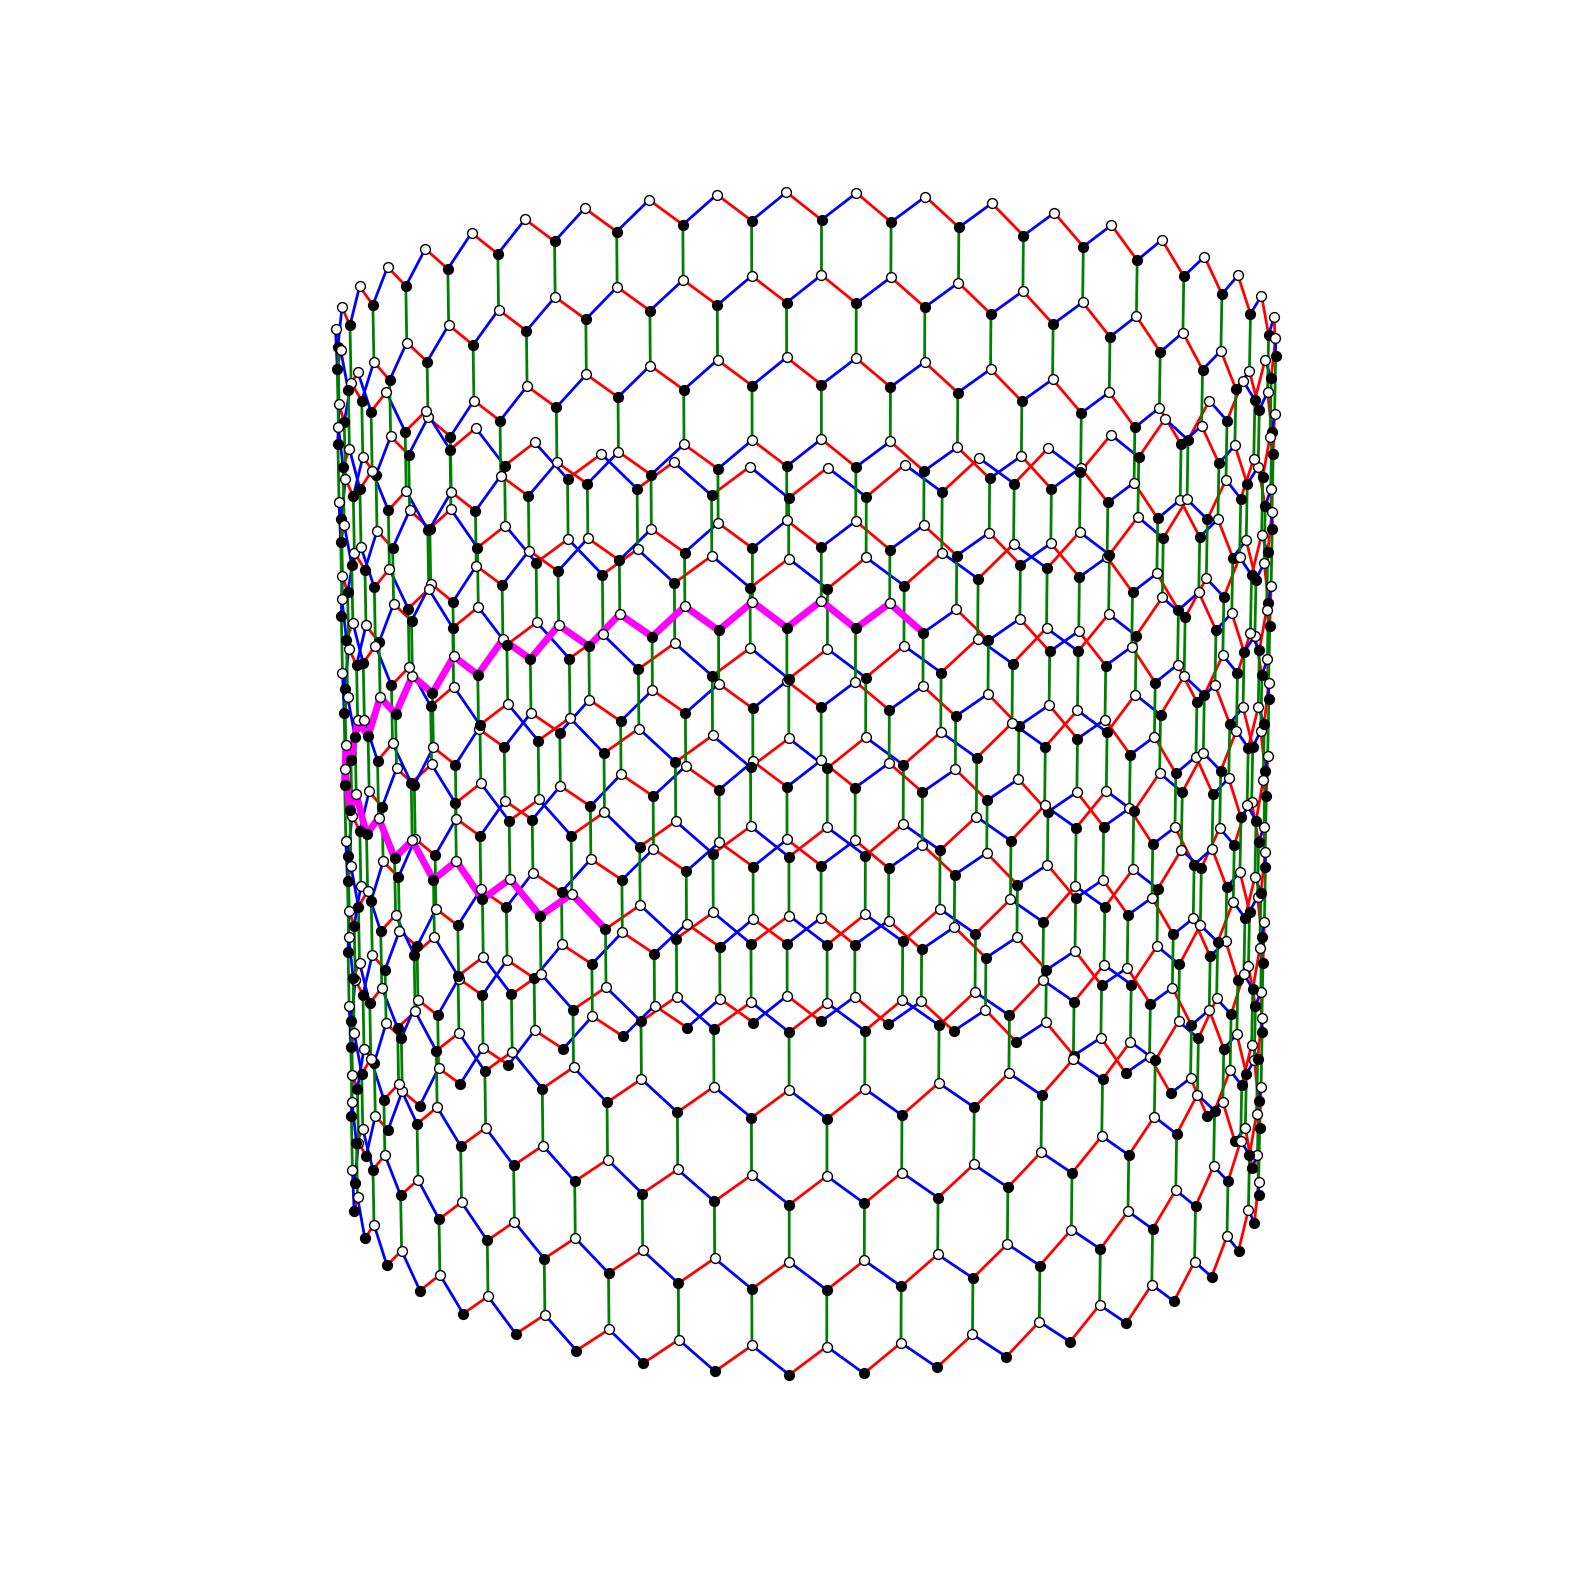

In [47]:
modell = site.SitesPBCx(Npx=40, Npy=10)


# honey.plot_honeycomb_cylinder(modell, make_gif = False, gif_filename = "cylinderr.gif", plot_anyon_bonds = False, 
#                               #sites = indices, 
#                               plaquette_site = 35, 
#                               azim = 180, elev = 0)

honey.plot_honeycomb_cylinder(modell, 
                    make_gif = False, gif_filename = "cylinderr.gif", 
                    #plaquette_site = 200, 
                    plot_anyon_bonds = True, fig_size = (20,30), 
                    dotsize = 50
                    )

### Fermionic representation of many wonderful things

In [48]:
import free_fermion_representation as f
importlib.reload(f)

<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

In [49]:
fgs = f.FermionicGaussianRepresentation(model)

# Topological Order Parameter

Create the loop around central plaquette (fine-tuned case for 5x5 lattice)

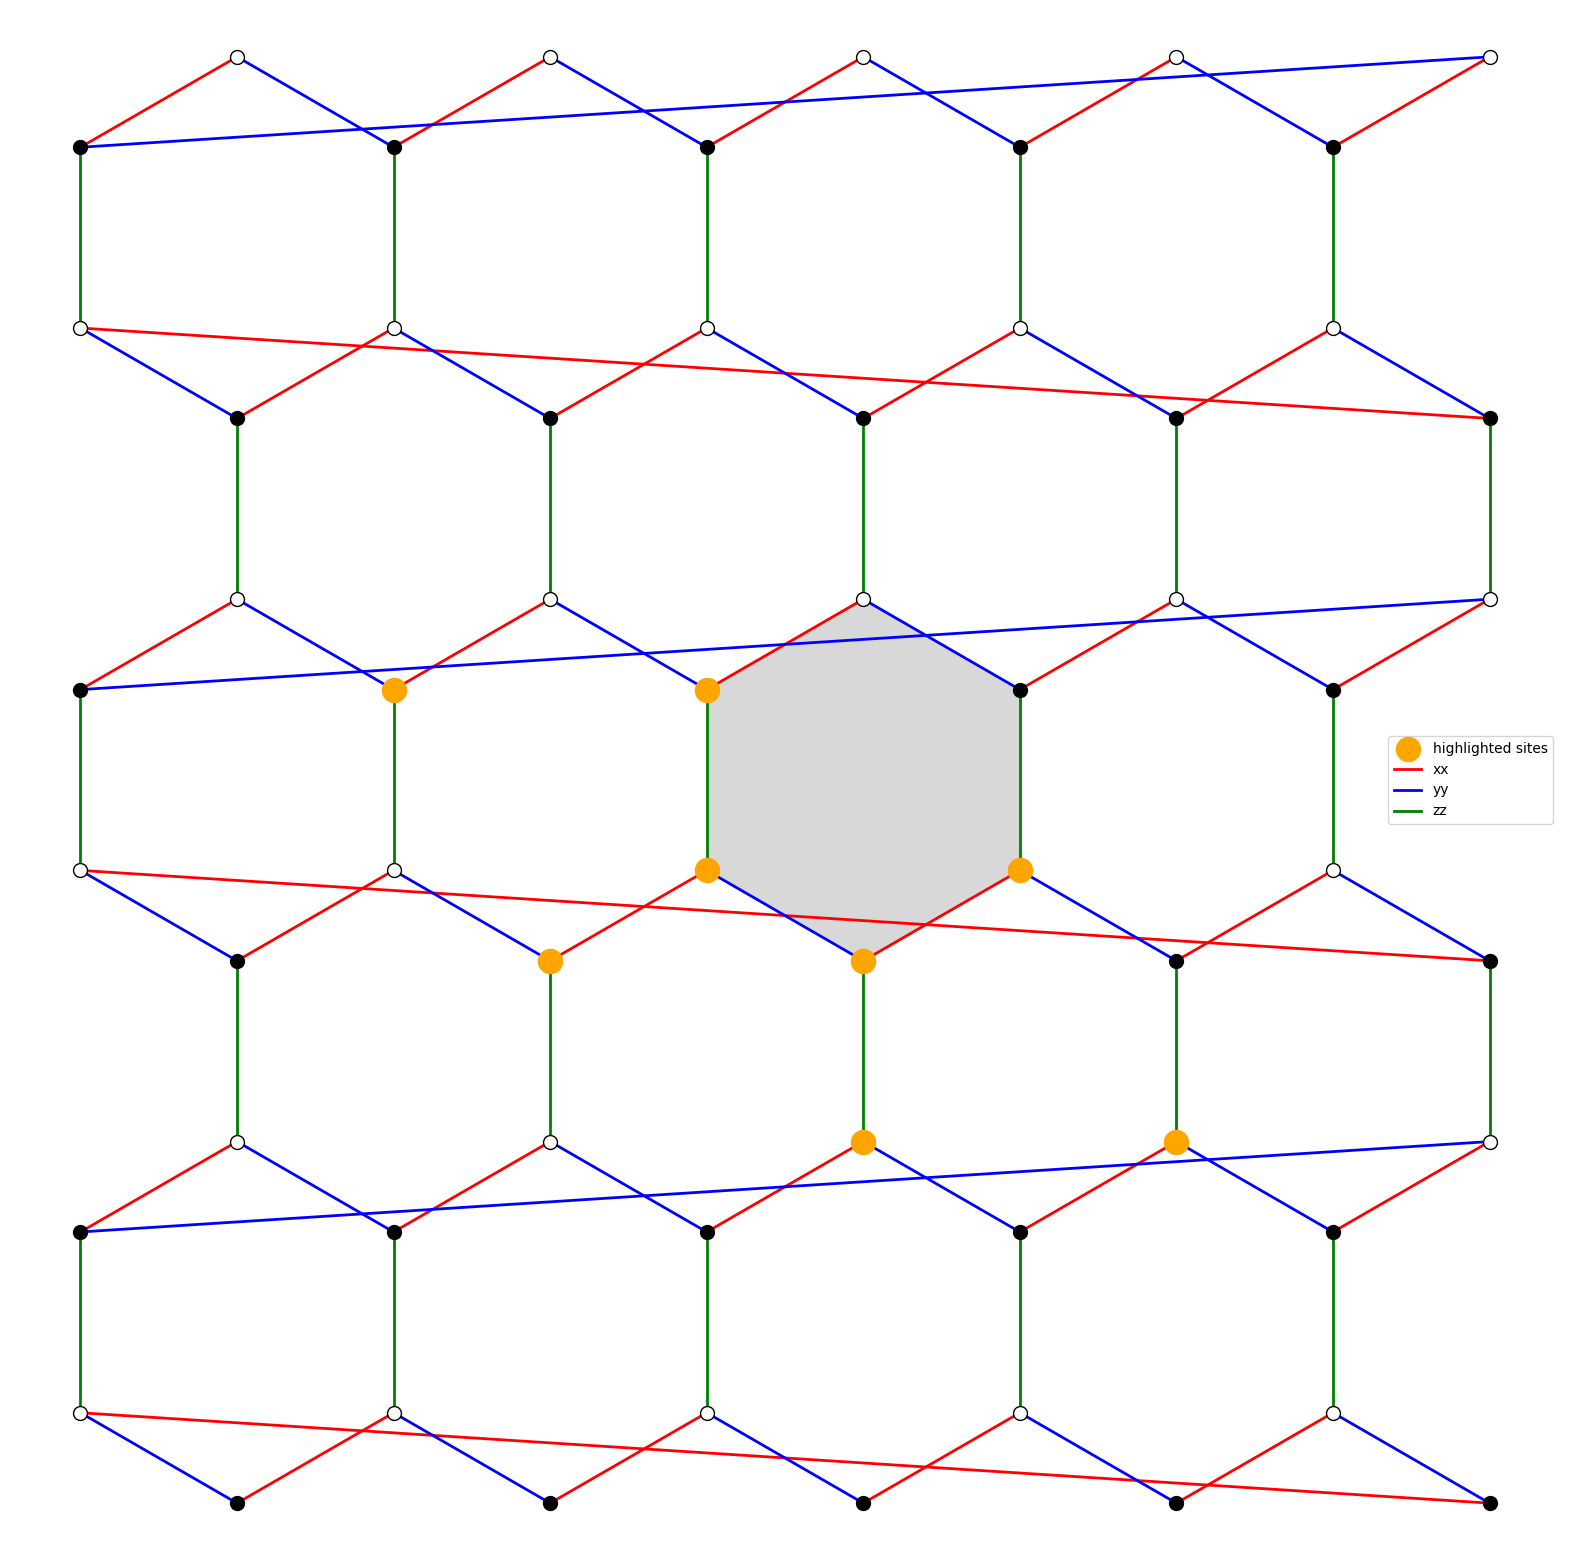

anyon bonds:  ([[np.int64(35), np.int64(36)], [np.int64(36), np.int64(37)], [np.int64(37), np.int64(38)], [np.int64(38), np.int64(39)]], np.int64(5), np.int64(3))


In [50]:
modell = site.SitesPBCx(Npx = 5, Npy = 5)
indices = [22,24,33,34,35,36,45,47]
honey.plot_honeycomb(modell, plot_anyon_bonds= False, plot_diagonal_bonds = False, 
                     sites = indices, plaquette_site = 35
                     )
print("anyon bonds: ", modell.get_anyonbonds())

In [96]:
model = site.SitesPBCx(Npx=5, Npy=5)
indices = [22,24,33,34,35,36,45,47]
# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1
print(loop)
print(fgs.order_parameter(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1-0j)


Now we time evolve the covariance matrix and then measure the loop again!

In [97]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

T = 0.65
# t = T*np.pi/4.
Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

N = 10
exp_value = []
for i in range(N):
    n = fgs.order_parameter(loop)
    exp_value.append(n)
    print(n)
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)


n = fgs.order_parameter(loop)
exp_value.append(n)
print(n)

(1-0j)
(-0.9728845349082528-0j)
(-0.32332164677353314-0j)
(-0.006769575091123648-0j)
(-0.15118566310856396-0j)
(0.36857469327689046-0j)
(-0.10673313230806294-0j)
(0.09243046545571729-0j)
(-0.9220003646634823-0j)
(1.1508013730992999-0j)
(-0.8256051925856142-0j)


## QUASI-ENERGY SPECTRUM

We define R = R0z R0y R=x as the operator to diagonalize to find the quasi energies of the floquet operator $U = e^{- i \hat{H} t}$

In [84]:
T = 0.65
# t = T*np.pi/4.

In [85]:
R0x, R0y, R0z, R = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

Now we proceed with doing the fourier transform of R, thus block diagonalizing R such that each block has eigenvalues indexed by a specific k momentum!

In [86]:
S = model.reordering_operator()
print(S.shape)
print(np.linalg.norm(S @ S.T - np.eye(S.shape[0])))
FT, ks = model.FTOperator()

(1240, 1240)
0.0


In [87]:
# block-diagonalize
Rk = FT.T.conj() @ R @ FT

len_block = 2*model.Nyrows

print("len_block: ", len_block)
print("len(ks)", len(ks))

# diagonalize blocks
eps = []
for i in range(model.Npx):
    e = np.linalg.eigvals(Rk[len_block*i:len_block*i+len_block, len_block*i:len_block*i+len_block])
    eps.append(e)
#eps is a list of len(ks) elements, each element is an array of length len_block
eps = np.real_if_close(1j * np.log(eps))
#eps is transformed into a matrix of shape (len(ks), len_block)
print("eps shape: ", eps.shape)

len_block:  62
len(ks) 20
eps shape:  (20, 62)


Text(0.5, 1.0, 'Quasi-energy dispersion relation, JT = 0.65')

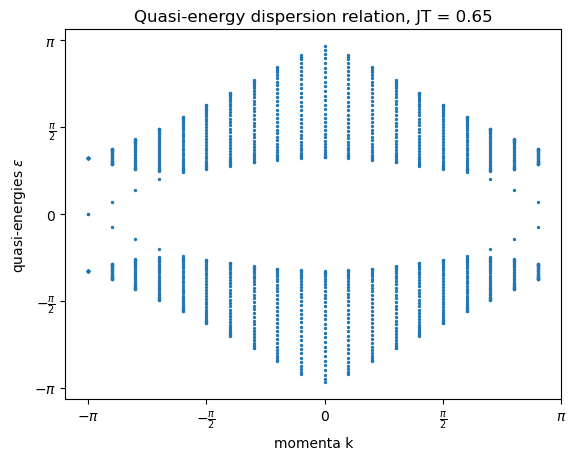

In [88]:
plt.scatter(np.stack([ks]*len_block, axis=-1).reshape(-1), np.reshape(eps, -1), s=2.)
plt.xlabel('momenta k')
plt.ylabel(r'quasi-energies $\epsilon$')
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.title(f'Quasi-energy dispersion relation, JT = {T}' )

len(ksnew):  21
len(eps_dic[0]):  1136
[ 0.78539816 -0.78539816 -0.78539816 ... -0.15512996  0.78539816
 -0.78539816]
[0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816 0.78539816
 0.95237789 0.95031968 0.94690546 0.94215937 0.93611514 0.92881596
 0.92031445 0.91067254 0.89996135 0.88826116 0.87566132 0.86226019
 0.84816515 0.83349254 0.81836764 0.80292465 0.64376606 0.64663649
 0.65136149 0.65785557 0.6660047  0.6756713  0.68669951 0.69892048
 0.78730652 0.71215734 0.72622945 0.77166474 0.74095603 0.7561589
 0.15512996 1.13495678 1.13134003 1.12533794 1.11698897 1.10634644
 1.09347804 1.07846531 1.06140301 1.04239866 1.02157201 0.99905475
 0.9749904  0.94953444 0.92285476 0.89513252 0.86656339 0.83735934
 0.80775091 

ValueError: x and y must have same first dimension, but have shapes (19,) and (568,)

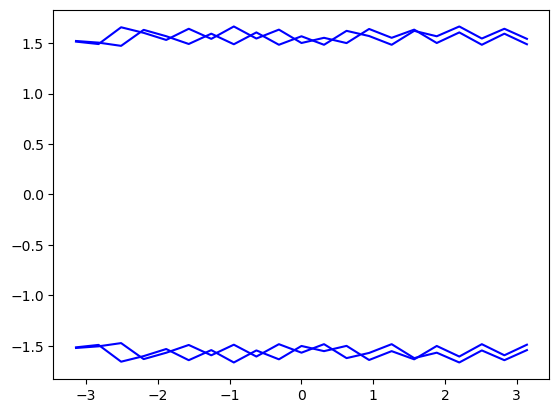

In [55]:
#valid for JT = 1

eps_array = np.reshape(eps, -1)
eps_arraycopy = eps_array.copy()
eps_dic = {}

eps_dic[0] = []
eps_dic[1] = []
eps_dic[2] = []
eps_dic[3] = []

epsilon = 0.1

for j in range(len(ks)):
    for i in range(len_block):
        value = eps_arraycopy[i + j*len_block]
        if value + np.pi/2 > - epsilon and value + np.pi/2 < epsilon:
            eps_dic[1].append(value)
        elif value - np.pi/2 > - epsilon and value - np.pi/2 < epsilon:
            eps_dic[2].append(value)
        elif value <= 0:
            eps_dic[0].append(value)
        elif value > 0: 
            eps_dic[0].append(value)
    

# eps_dic[0] = np.array(eps_dic[0])
# eps_dic[0] = np.concatenate([eps_dic[0], eps_dic[0][0:len_block]])

len_blocknew = len(eps_dic[2]) // len(ks)

for i in [1,2]:
    lennblock = len(eps_dic[i]) // len(ks)
    eps_dic[i] = np.array(eps_dic[i])
    eps_dic[i] = np.concatenate([eps_dic[i], eps_dic[i][0:len_blocknew]])

eps_dic[0] = np.array(eps_dic[0])
eps_dic[0] = np.concatenate([eps_dic[0], eps_dic[0][0:2]])

# eps_dic[3] = np.array(eps_dic[3])
# eps_dic[3] = np.concatenate([eps_dic[0], eps_dic[3][0:2]])

# eps_dic[0][len(eps_dic[0])//2-1] = np.pi
# eps_dic[0][len(eps_dic[0])//2] = np.pi

ksnew = np.append(ks,np.pi)


# for start in range(0, len(eps_array), len_block):
#     end = start + len_block
#     eps_dic[2][start:end] = np.sort(eps_dic[2][start:end])


for i in range(len_blocknew):
    plt.plot(ksnew, np.array([eps_dic[2][i + j*(len_blocknew)] for j in range(len(ksnew))]), color = 'blue')

for i in range(len_blocknew):
    plt.plot(ksnew, np.array([eps_dic[1][i + j*(len_blocknew)] for j in range(len(ksnew))]), color = 'blue')

print("len(ksnew): ", len(ksnew))

ksedge = ksnew.tolist()
ksedge.remove(-np.pi/2)
ksedge.remove(np.pi/2)
ksedge = np.array(ksedge)

print("len(eps_dic[0]): ", len(eps_dic[0]))
print(eps_dic[0])
positive_vals = eps_dic[0][eps_dic[0] > 0]
center_pos = len(positive_vals) // 2
positive_vals = np.insert(positive_vals, center_pos, np.pi)
negative_vals = eps_dic[0][eps_dic[0] < 0]
print(positive_vals)
print(negative_vals)
negative_vals = np.delete(negative_vals, len(negative_vals) // 2)

# negative_vals.tolist().pop(1)
# negative_vals.tolist().pop(2)
print("len(negative_vals): ", len(negative_vals))

negative_vals = np.array(negative_vals)

plt.plot(ksedge, positive_vals, color = 'red')
plt.plot(ksedge, negative_vals, color = 'green')

plt.xlabel('momenta k')
plt.ylabel(r'quasi-energies $\epsilon$')
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.title(f'Quasi-energy dispersion relation, JT = {T}' )
plt.savefig(f'PBCx_disprel_JT{T}.png')
# plt.plot(ksedge, eps_dic[3], color = 'red')
# plt.plot(ksedge, eps_dic[0], color = 'green')


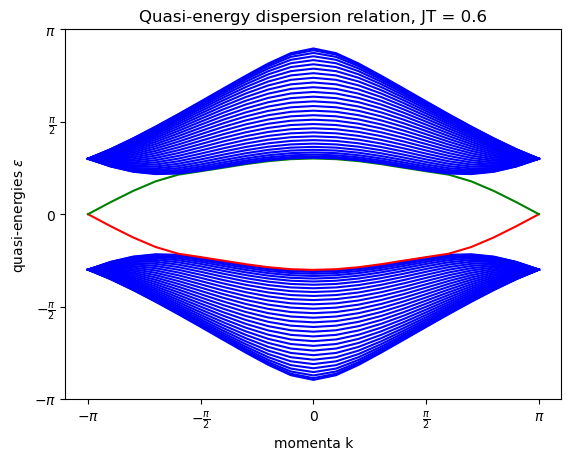

In [46]:
#valid for JT = 0.5

eps_array = np.reshape(eps, -1)
eps_array = np.concatenate([eps_array, eps_array[0:len_block]])
ks = np.append(ks,np.pi)

for start in range(0, len(eps_array), len_block):
    end = start + len_block
    eps_array[start:end] = np.sort(eps_array[start:end])

for i in range(len_block):
    if i == len_block//2 -1:
        plt.plot(ks, np.array([eps_array[i + j*len_block] for j in range(len(ks))]), color = 'red')
    elif i == len_block//2:
        plt.plot(ks, np.array([eps_array[i + j*len_block] for j in range(len(ks))]), color = 'green')
    else:
        plt.plot(ks, np.array([eps_array[i + j*len_block] for j in range(len(ks))]), color = 'blue')
plt.xlabel('momenta k')
plt.ylabel(r'quasi-energies $\epsilon$')
plt.xticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.yticks(ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                  labels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
plt.title(f'Quasi-energy dispersion relation, JT = {T}' )
plt.savefig(f'PBCx_disprel_JT{T}.png')

In [ ]:
print(len_block)

102


In [ ]:
# eigvals, eigvecs = np.linalg.eig(R)
# print(eigvals)